# Customer churn prediction for a telecommunications company

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
df.duplicated().sum()

0

In [129]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [130]:
df.drop(columns=['customerID', 'gender', 'SeniorCitizen', 'PaperlessBilling'], axis=1, inplace=True)

In [131]:
df.shape

(7043, 17)

In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [133]:
df.describe(include='object').T

,count,unique,top,freq
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473
StreamingTV,7043,3,No,2810


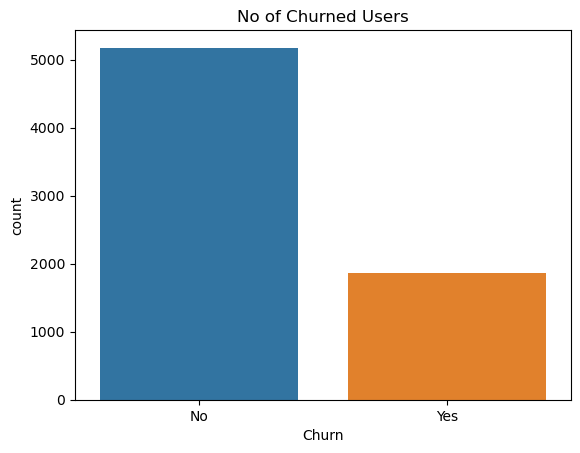

In [134]:
plt.figure()
sns.countplot(x='Churn', data=df)

plt.title('No of Churned Users');

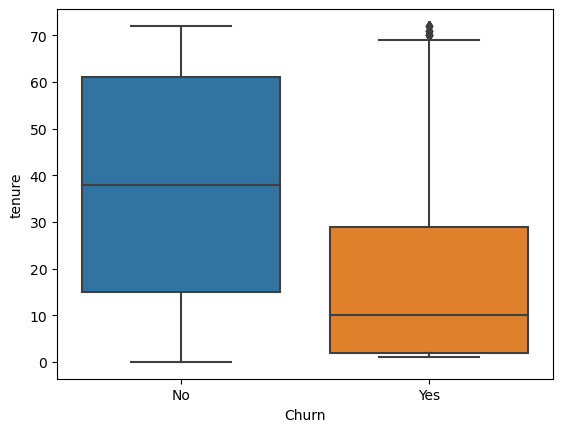

In [257]:
sns.boxplot(x='Churn', y='tenure', data=df); # Newer customers churned

Contract
Month-to-month    55%
Two year          24%
One year          21%
Name: proportion, dtype: object


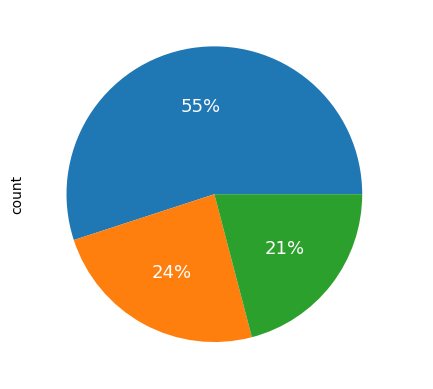

In [269]:
plt.figure()

df['Contract'].value_counts().plot(kind='pie',
                                   labels=df['Contract'].unique().tolist(),
                                   autopct='%.0f%%',
                                   textprops={'color': '#fff', 'fontsize': 13});

print(np.round(df['Contract'].value_counts(normalize=True) * 100).astype(int).astype(str) + '%')
# More than half of total customers were on MONTHLY subscription

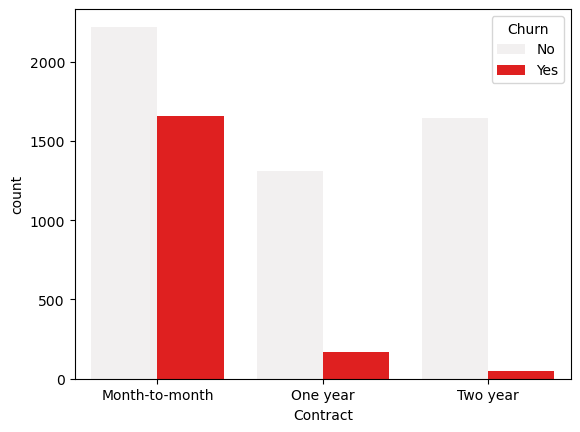

In [245]:
sns.countplot(x='Contract', data=df, hue='Churn', color='red'); # For each contract type, there were more non-churners

In [137]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [151]:
(df.TotalCharges.str.strip() == '').sum()

11

In [154]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [175]:
def fill_empty_TotalCharges(val):
    return np.nan if val == '' else float(val)
    
df['TotalCharges'] = df['TotalCharges'].apply(fill_empty_TotalCharges)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
print(df['TotalCharges'].dtype)

float64


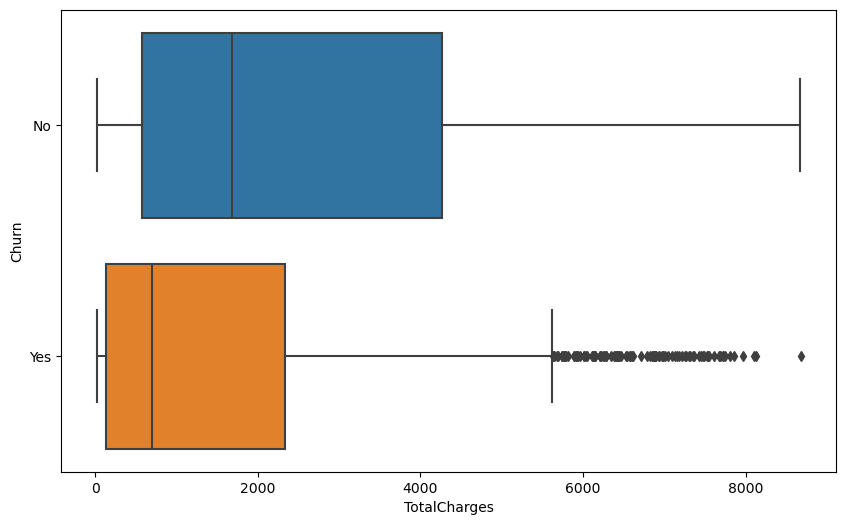

In [177]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalCharges', y='Churn', data=df); # Customers who churned have been charged less as they had lesser tenure

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_20244\2005176918.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x='tenure', y='TotalCharges', data=df, hue='Churn', palette=pallete);


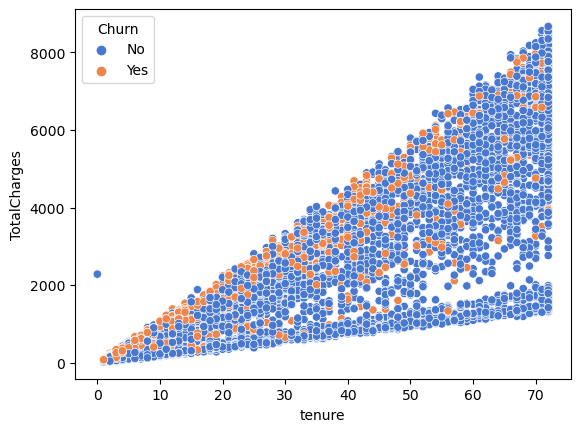

In [200]:
pallete = sns.color_palette('muted')
sns.scatterplot(x='tenure', y='TotalCharges', data=df, hue='Churn', palette=pallete);

# Loyal customers were profited from the most

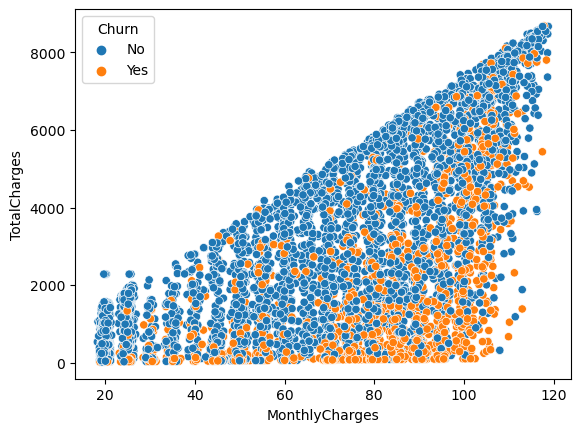

In [202]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn');

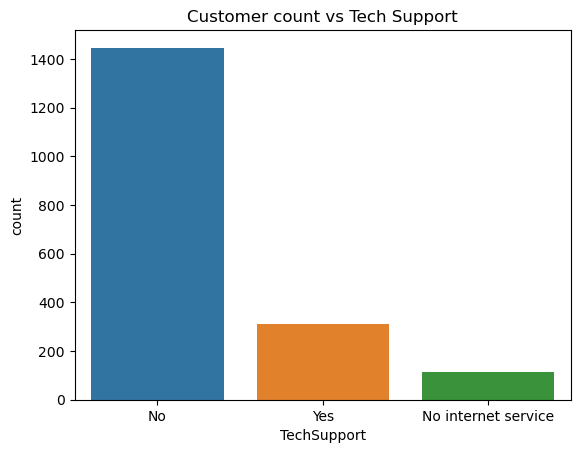

In [281]:
# How many customers contacted Tech Support before churning?

sns.countplot(x='TechSupport', data=df[df.Churn == 'Yes']);
plt.title('Customer count vs Tech Support');

In [275]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

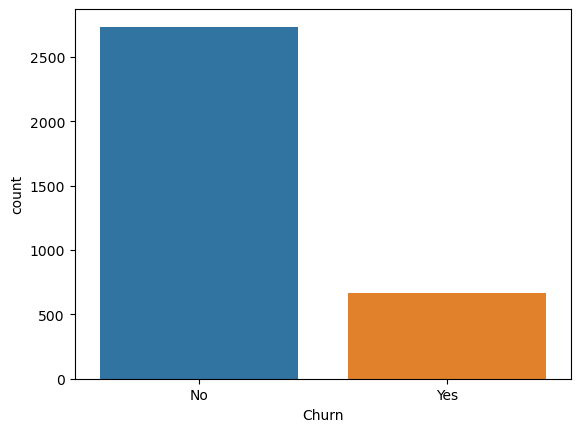

In [280]:
# How many partners churned

sns.countplot(x='Churn', data=df[df.Partner == 'Yes']);

In [299]:
# What percentage of partners churned?

churned_partners = len(df[(df.Partner == 'Yes') & (df.Churn == 'Yes')])
total_partners = len(df.Partner)
print(f'{np.round(churned_partners / total_partners * 100, 1)}%') # Nearly 10% of partners churned.

9.5%


# Why did customers churn?

In [ ]:
# Was it security issues?



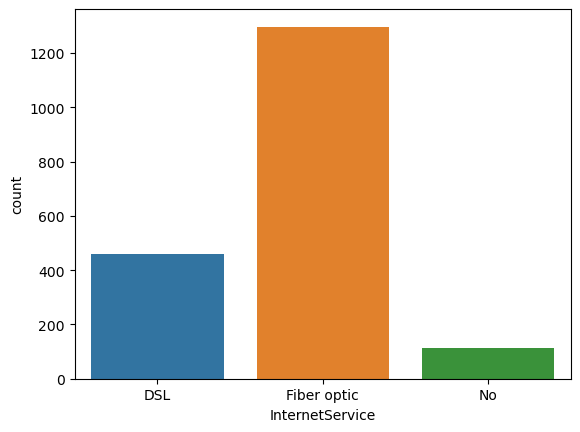

In [333]:
# What InternetService type did churners mostly opt for?

sns.countplot(x='InternetService', data=df[df.Churn == 'Yes']);

In [324]:
streamers = df[(df.StreamingTV == 'Yes') | (df.StreamingMovies == 'Yes')]

In [300]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [301]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [318]:
# What percentage of streamers experienced issues with internet service?

service_issues = df[(df.StreamingTV == 'No internet service') | (df.StreamingMovies == 'No internet service')]
percent = np.round(len(service_issues) / len(streamers) * 100, 1)

print(f'{percent}%')

43.6%


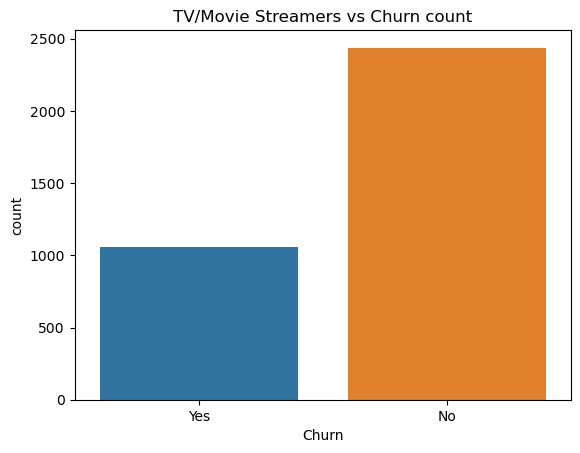

In [334]:
# Did TV/movie streamers churn?

sns.countplot(x='Churn', data=streamers);
plt.title('TV/Movie Streamers vs Churn count');

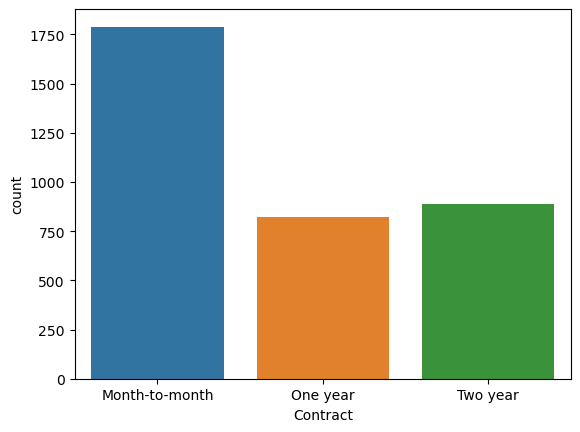

In [330]:
# What contract type did TV/Movie streamers mostly opt for?

sns.countplot(x='Contract', data=streamers);

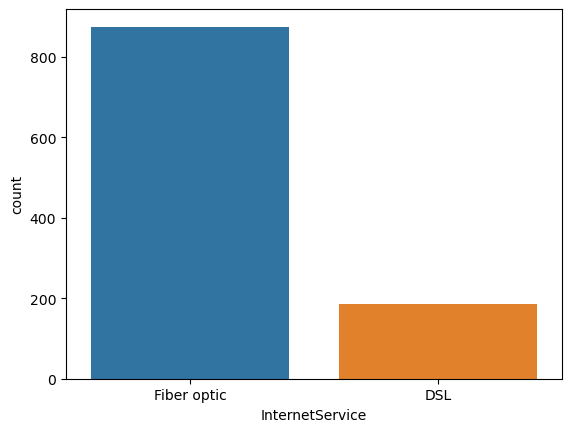

In [338]:
# What InternetService type did TV/Movie streamers who churned mostly opt for?

sns.countplot(x='InternetService', data=streamers[streamers.Churn == 'Yes']);

In [22]:
df.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
